# Project 2
## least squares regression and nearest neighbor classifiers

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke

### task 2.1 least squares regression for missing value prediction

Least squares polynomial fit with loss $E(w) = \big\vert\big\vert Xw -y \big\vert\big\vert^2$:

$$
w = \big( X^T X\big)^{-1} X^T y
$$

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots  & x_1^d \\ 
 &  &  & \vdots  & \\ 
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}, \ \ \ \ y = \begin{bmatrix}
y_1 \\
\vdots \\ 
y_n\\ 
\end{bmatrix}
$$

For this task fit models for $d\in \{ 1, 5, 10\}$

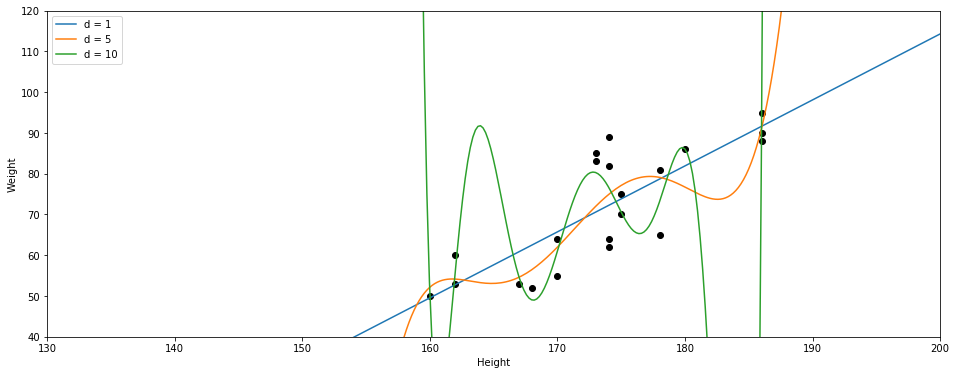

In [236]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

data = np.loadtxt('whData.dat',
                  dtype=np.object,
                  comments='#',
                  delimiter=None)

W = data[:,0].astype('float32')
H = data[:,1].astype('float32')
G = data[:,2]

w_mask = ((W > 0) * 1).nonzero()

W = W[w_mask]
H = H[w_mask]
G = G[w_mask]

# to make the code more numerically stable we down-scale it by some 
# large number so that all values are between 0 and 1
scale = 200
W = W/scale
H = H/scale

W = W.astype('float64')
H = H.astype('float64')

# solve the solution "zufuss"
# ------------ d = 1 ----------
X = np.vander(H, 1+1)  # (21,2)
y = np.array([W]).T    # (21,1)
w = inv(X.T @ X) @ (X.T @ y)
ax.plot([0, 200], [w[0] * 0 + w[1], w[0] * 200 + w[1]], 
         label='d = 1')


# ------------ d = 5 ----------
d = 5
X = np.vander(H, d+1)
y = np.array([W]).T        # (21,1)

# pinv is more numerically stable than the 'naive' implementation above
w = np.squeeze(pinv(X) @ y)  # pinv = (X^T X) X^T
_x_ = np.linspace( 0, 1, 1000)
p = np.poly1d(w)

ax.plot(_x_, p(_x_), label="d = 5")

# ------------ d = 10 ----------
d = 10
X = np.vander(H, d+1)
y = np.array([W]).T        # (21,1)

# pinv is more numerically stable than the 'naive' implementation above
w = np.squeeze(pinv(X) @ y)  # pinv = (X^T X) X^T
_x_ = np.linspace( 0, 1, 1000)
p = np.poly1d(w)

ax.plot(_x_, p(_x_), label="d = 10")
# ------------------------------

ax.scatter(H, W, color='black')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

ax.set_ylim([40/scale, 120/scale])
ax.set_xlim([130/scale, 200/scale])
ax.set_xticklabels([int(x * scale) for x in ax.get_xticks()])
ax.set_yticklabels([int(y * scale) for y in ax.get_yticks()])

plt.legend()
plt.show()